In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel("C:/Users/akash/Desktop/Flight_Price_Prediction/Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR -> DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL -> LKO -> BOM -> COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU -> NAG -> BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR -> NAG -> DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
train_data.dropna(inplace=True)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [8]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [11]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR -> DEL,2021-02-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2021-02-11 05:50:00,2021-02-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2021-02-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU -> NAG -> BLR,2021-02-11 18:05:00,2021-02-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR -> NAG -> DEL,2021-02-11 16:50:00,2021-02-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2021-02-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2021-02-11 05:50:00,2021-02-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2021-02-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,2021-02-11 18:05:00,2021-02-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,2021-02-11 16:50:00,2021-02-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_minutes']=df[col].dt.minute
    
def drop_columns(df,col):
    df.drop(col,axis=1,inplace=True)

In [16]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')

drop_columns(train_data,'Dep_Time')

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2021-02-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,2021-02-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,2021-02-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [18]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')

drop_columns(train_data,'Arrival_Time')

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
'2h 50m'.split()

['2h', '50m']

In [21]:
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h '+ duration[i] 

In [22]:
train_data['Duration']=duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
'2h 50m'.split()

['2h', '50m']

In [25]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]


In [26]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_minutes']=train_data['Duration'].apply(minute)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [28]:
drop_columns(train_data,'Duration') # dropping duration

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR -> DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [30]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_minutes']=train_data['Duration_minutes'].astype(int)

In [31]:
train_data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Total_Stops             object
Additional_Info         object
Price                    int64
Journey_day              int64
Journey_month            int64
Dep_Time_hour            int64
Dep_Time_minutes         int64
Arrival_Time_hour        int64
Arrival_Time_minutes     int64
Duration_hours           int32
Duration_minutes         int32
dtype: object

In [32]:
categ_col=[col for col in train_data.columns if train_data[col].dtype=='O'] #identifying categorical column
categ_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [33]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O'] #identifying numeric column
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'Duration_hours',
 'Duration_minutes']

In [34]:
## Nominal Data -- Onehot encoding
## Ordinal Data -- Label encoding

In [35]:
categorical=train_data[categ_col]

In [36]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR -> DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,1 stop,No info


In [37]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

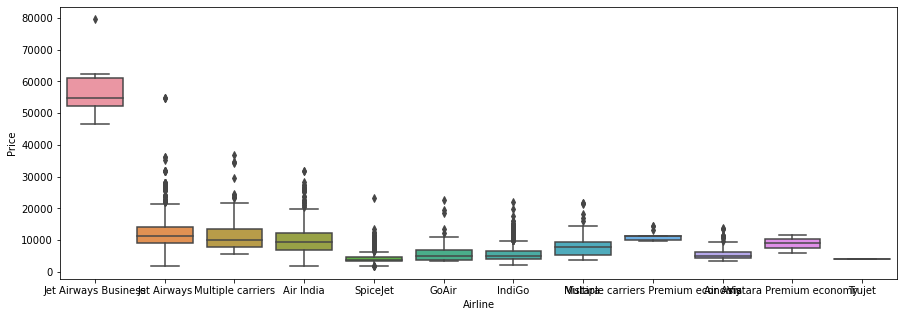

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

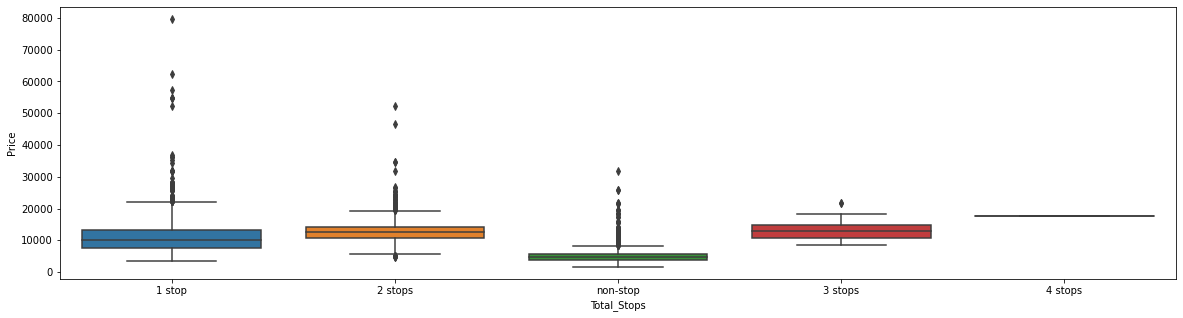

In [39]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [40]:
Airline  = pd.get_dummies(categorical['Airline'],drop_first=True)
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [41]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

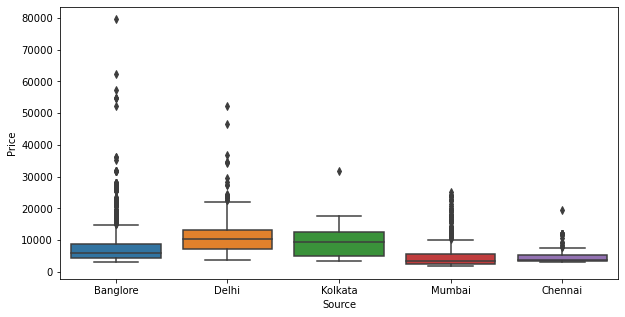

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [43]:
Source = pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

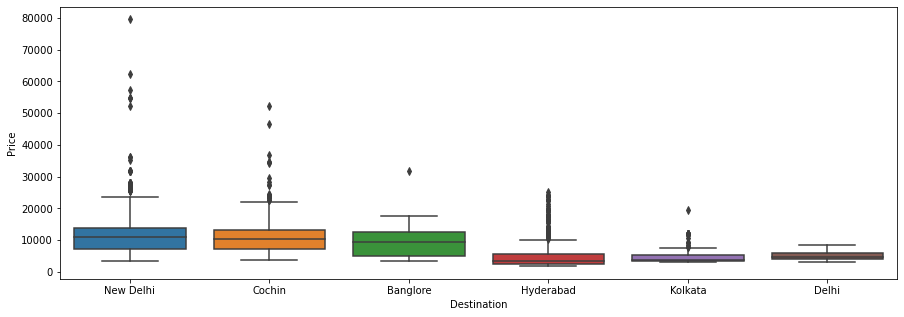

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [46]:
Destination= pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorical['Route']

0                      BLR -> DEL
1        CCU -> IXR -> BBI -> BLR
2        DEL -> LKO -> BOM -> COK
3               CCU -> NAG -> BLR
4               BLR -> NAG -> DEL
                   ...           
10678                  CCU -> BLR
10679                  CCU -> BLR
10680                  BLR -> DEL
10681                  BLR -> DEL
10682    DEL -> GOI -> BOM -> COK
Name: Route, Length: 10682, dtype: object

In [48]:
a=categorical['Route'].str.split('->').str[0]
a

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [49]:
b=categorical['Route'].str.split('->').str[1]
b

0          DEL
1         IXR 
2         LKO 
3         NAG 
4         NAG 
         ...  
10678      BLR
10679      BLR
10680      DEL
10681      DEL
10682     GOI 
Name: Route, Length: 10682, dtype: object

In [50]:
c=categorical['Route'].str.split('->').str[2]
c

0          NaN
1         BBI 
2         BOM 
3          BLR
4          DEL
         ...  
10678      NaN
10679      NaN
10680      NaN
10681      NaN
10682     BOM 
Name: Route, Length: 10682, dtype: object

In [51]:
d=categorical['Route'].str.split('->').str[3]
d

0         NaN
1         BLR
2         COK
3         NaN
4         NaN
         ... 
10678     NaN
10679     NaN
10680     NaN
10681     NaN
10682     COK
Name: Route, Length: 10682, dtype: object

In [52]:
e=categorical['Route'].str.split('->').str[4]
e

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
10678    NaN
10679    NaN
10680    NaN
10681    NaN
10682    NaN
Name: Route, Length: 10682, dtype: object

In [53]:
categorical['Route_1']=a

<ipython-input-53-c03533b62d4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=a


In [54]:
categorical['Route_2']=b

<ipython-input-54-9ce035cc3ada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=b


In [55]:
categorical['Route_3']=c

<ipython-input-55-1e0fe060c2a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_3']=c


In [56]:
categorical['Route_4']=d

<ipython-input-56-a36e452b55d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_4']=d


In [57]:
categorical['Route_5']=e

<ipython-input-57-81b8ef4ca683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_5']=e


In [58]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR -> DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [59]:
drop_columns(categorical,'Route')

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [61]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [62]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [63]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [64]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [65]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [66]:
# for labelling feature
from sklearn.preprocessing import LabelEncoder

In [67]:
encoder=LabelEncoder()

In [68]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [69]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

<ipython-input-69-822def13bd0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [70]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [71]:
drop_columns(categorical,'Additional_Info')

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [73]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [74]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

<ipython-input-74-e768699902ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [75]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [76]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [77]:
data_train

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5,0,...,0,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5,1,...,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5,0,...,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,12648,3,1,11,30,14,10,2,40


In [78]:
drop_columns(data_train,'Airline')
drop_columns(data_train,'Source')
drop_columns(data_train,'Destination')

In [79]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [80]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [81]:
#handling outlier in data

In [82]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


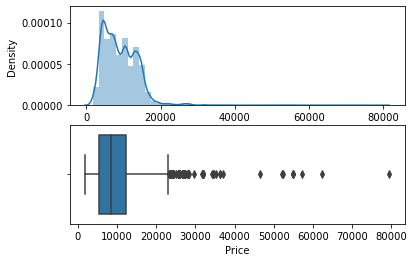

In [83]:
plot(data_train,'Price')

In [84]:
# when price is greater then 40k replace with median
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


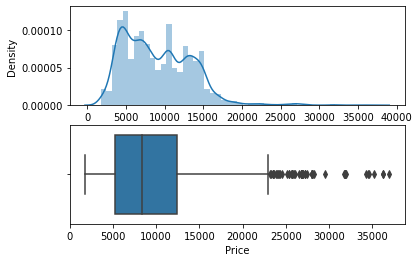

In [85]:
plot(data_train,'Price')

In [86]:
X=data_train.drop('Price',axis=1) # price needs to be predicted so its dropped
X

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,11,30,14,10,2,40


In [87]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [88]:
# Feature selection techniques

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mutual_info_classif(X,y)

array([2.16465028, 2.05884767, 2.78917729, 2.28661074, 1.48919066,
       0.73849289, 0.73032563, 0.11389362, 0.66168458, 0.93967181,
       0.        , 0.58117364, 0.01023178, 0.32281401, 0.        ,
       0.23421616, 0.        , 0.17098964, 1.5344874 , 0.87196829,
       0.29264741, 1.53544221, 0.41044173, 0.28252013, 0.17814863,
       0.37723175, 1.10369347, 0.89253185, 1.40844999, 1.21328369,
       1.83938505, 1.53160167, 1.78147921, 1.05999591])

In [91]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.159777
Route_1,2.040322
Route_2,2.731908
Route_3,2.323040
Route_4,1.491429
Route_5,0.741089
Air India,0.754164
GoAir,0.100873
IndiGo,0.679106
Jet Airways,0.911526


In [92]:
imp.columns=['importance']

In [93]:
imp.columns

Index(['importance'], dtype='object')

In [94]:
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.731908
Route_3,2.323040
Total_Stops,2.159777
Route_1,2.040322
Arrival_Time_hour,1.835903
Duration_hours,1.770641
Cochin,1.557476
Arrival_Time_minutes,1.530498
Delhi,1.510905
Route_4,1.491429


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [97]:
from sklearn import metrics
def predict_randomforest(ml_model):
    model=ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    prediction=model.predict(X_test)
    print('Prediction are: {}'.format(prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,prediction)
    print("r2 score: {}".format(r2_score))
    
    print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
    print("MSE: ",metrics.mean_squared_error(y_test,prediction))
    print("RMSE: ",np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
    
    sns.distplot(y_test-prediction)

In [98]:
from sklearn.ensemble import RandomForestRegressor

Training score: 0.9529884390757912
Prediction are: [ 4218.27733333 13271.676       4994.89       ...  4651.
  2203.1         7050.74      ]


r2 score: 0.8305591856467958
MAE:  1158.6433087513278
MSE:  3283764.5504160034
RMSE:  34.03884999160999


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


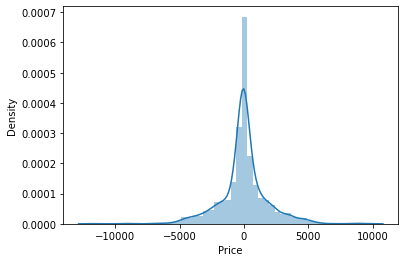

In [99]:
predict_randomforest(RandomForestRegressor())